In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [69]:
data = pd.read_excel(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 21\Daily_Demand_Forecasting_Orders_reg.xls')
data.head(5)

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [70]:
data.describe(include = 'all')

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [71]:
data.dtypes

Week of the month                              int64
Day of the week                                int64
Non-urgent order                             float64
Urgent order                                 float64
Order type A                                 float64
Order type B                                 float64
Order type C                                 float64
Fiscal sector orders                         float64
Orders from the traffic controller sector      int64
Banking orders (1)                             int64
Banking orders (2)                             int64
Banking orders (3)                             int64
Target (Total orders)                        float64
dtype: object

In [72]:
data1.isnull().sum()

Week of the month                            0
Day of the week                              0
Non-urgent order                             0
Urgent order                                 0
Order type A                                 0
Order type B                                 0
Order type C                                 0
Fiscal sector orders                         0
Orders from the traffic controller sector    0
Banking orders (1)                           0
Banking orders (2)                           0
Banking orders (3)                           0
Target (Total orders)                        0
dtype: int64

In [73]:
data.corr()

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Week of the month,1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,0.000964,-0.194088,0.392310,0.147086,-0.157059,0.211709
Day of the week,-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,0.000964,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712
Banking orders (1),0.392310,-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,0.003523,-0.162309,1.000000,0.262905,0.221335,0.630365


In [74]:
data.columns

Index(['Week of the month', 'Day of the week', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [75]:
data = data[['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Banking orders (1)', 'Banking orders (2)', 'Target (Total orders)']]
data.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Banking orders (1),Banking orders (2),Target (Total orders)
0,316.307,223.270,61.543,175.586,302.448,44914,188411,539.577
1,128.633,96.042,38.058,56.037,130.580,21399,89461,224.675
2,43.651,84.375,21.826,25.125,82.461,3452,21305,129.412
3,171.297,127.667,41.542,113.294,162.284,33703,69054,317.120
4,90.532,113.526,37.679,56.618,116.220,19646,16411,210.517


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Banking orders (1)', 'Urgent order']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.198709,Banking orders (1)
1,2.198709,Urgent order


In [77]:
data = data[['Banking orders (1)', 'Urgent order', 'Target (Total orders)']]
data.head()

,Banking orders (1),Urgent order,Target (Total orders)
0,44914,223.270,539.577
1,21399,96.042,224.675
2,3452,84.375,129.412
3,33703,127.667,317.120
4,19646,113.526,210.517


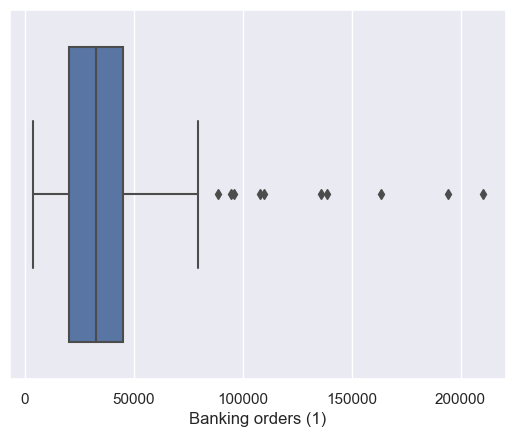

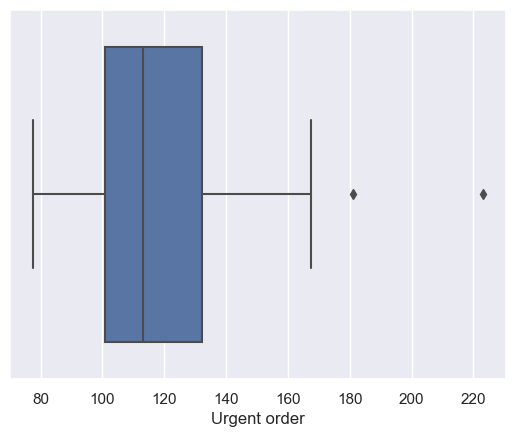

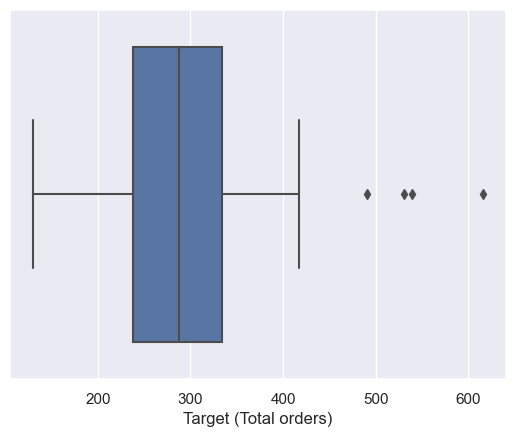

In [78]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [79]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-IQR
Upper = q3+IQR

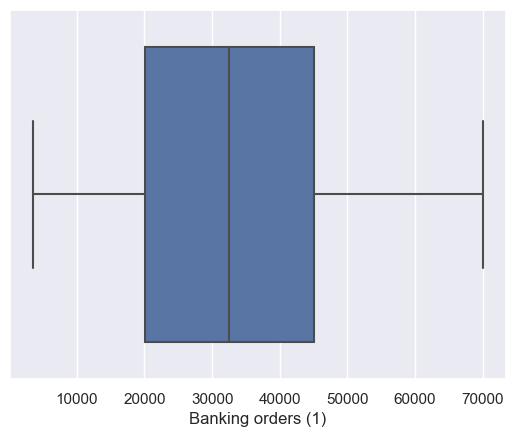

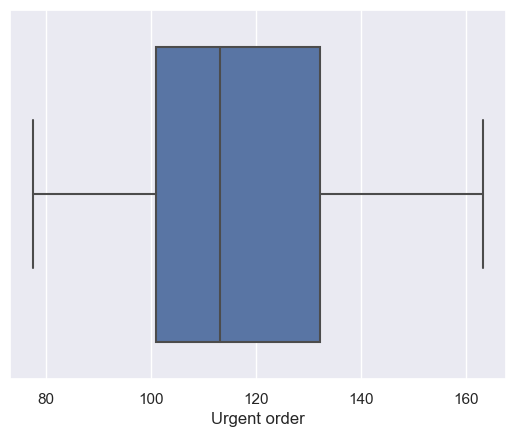

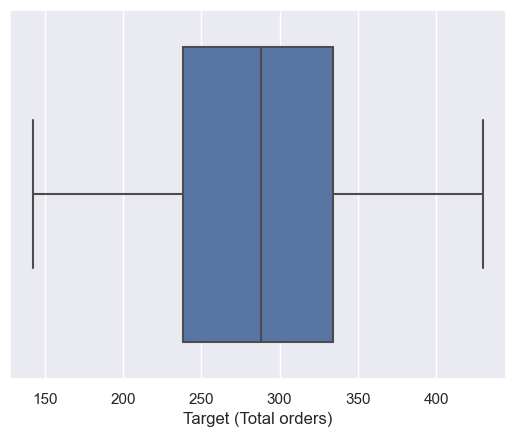

In [80]:
for i in data.columns:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [81]:
data.columns

Index(['Banking orders (1)', 'Urgent order', 'Target (Total orders)'], dtype='object')

In [93]:
y = data['Target (Total orders)']

X = data[['Banking orders (1)', 'Urgent order']]

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [96]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return mae
    return mse
    return rmse
    return r2

In [97]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Accuracy is -62.18417000756449 %
